# Name - Anushka Anil Panhale

## CHURN DATA

***********************

In [1]:
import pandas as pd

In [3]:
ch=pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\Codsoft\Churn_Modelling.csv")

In [4]:
ch.shape

(10000, 14)

### CLEANING

In [5]:
ch.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
ch=ch.drop(['CustomerId'],axis=1)

In [7]:
import numpy as np

In [8]:
# ch.replace({' ':np.nan},inplace=True)      ### CONVERTING BLANK ROWS AS NULLS

In [9]:
ch.isnull().sum()

RowNumber          0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [12]:
# ch.gender.replace({'Male':0, 'Female':1},inplace=True)
# ch.Partner.replace({'No':0, 'Yes':1},inplace=True)
# ch.Dependents.replace({'No':0, 'Yes':1},inplace=True)
# ch.PhoneService.replace({'No':0, 'Yes':1},inplace=True)
# ch.MultipleLines.replace({'No':0, 'Yes':1 ,'No phone service':2},inplace=True)
# ch.OnlineSecurity.replace({'No':0, 'Yes':1 ,'No internet service':2},inplace=True)
# ch.OnlineBackup.replace({'No':0, 'Yes':1 ,'No internet service':2},inplace=True)
# ch.DeviceProtection.replace({'No':0, 'Yes':1 ,'No internet service':2},inplace=True)
# ch.TechSupport.replace({'No':0, 'Yes':1 ,'No internet service':2},inplace=True)
# ch.StreamingTV.replace({'No':0, 'Yes':1 ,'No internet service':2},inplace=True)
# ch.Contract.replace({'Month-to-month':0,'One year':1,'Two year':2},inplace=True)
# ch.PaperlessBilling.replace({'No':0, 'Yes':1},inplace=True)
# ch.Churn.replace({'No':0, 'Yes':1},inplace=True)

In [13]:
ch[ch.select_dtypes(include='object').columns]=ch[ch.select_dtypes(include='object').columns].apply(le.fit_transform)

In [14]:
# ch.info()

In [15]:
# ch.head(3)

### SAMPLING

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
ch_train ,ch_test = train_test_split(ch,test_size=.2)

In [18]:
ch_train_x=ch_train.iloc[:,0:-1]
ch_test_x = ch_test.iloc[:,0:-1]

ch_train_y=ch_train.iloc[:,-1]
ch_test_y = ch_test.iloc[:,-1]

In [19]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

In [21]:
linreg.fit(ch_train_x,ch_train_y)

LinearRegression()

## R square

In [22]:
linreg.score(ch_train_x,ch_train_y)   ### R square

0.1335459255475806

### ADJUSTED R SQUARE

In [23]:
Rsquare = linreg.score(ch_train_x,ch_train_y) 
N=ch_train_x.shape[0]
K=ch_train_x.shape[1]

Adju_Rsquare = 1-(1-Rsquare)*(N-1)/(N-K-1)
Adju_Rsquare


0.13224412901653904

### Intercept (B0 value)

In [24]:
linreg.intercept_

-0.08019227525466849

### coefficient of x( slope i.e values of B1,B2....)

In [25]:
linreg.coef_

array([-2.12375517e-07, -6.95208282e-06, -9.65074560e-05,  1.03601356e-02,
       -7.48151145e-02,  1.12376194e-02, -2.20587110e-03,  6.46883032e-07,
       -1.16684500e-02, -3.43086178e-03, -1.39114037e-01,  5.49874965e-08])

### Predicted value of each record 

In [26]:
pred_train_log=linreg.predict(ch_train_x)
pred_test_log=linreg.predict(ch_test_x)

In [27]:
## Errors---->>> Distance betweeen Actual value and Predicted value
## Checking the Assumptions ---->> Assumptions are only on the train data

In [28]:
err_train = ch_train_y - pred_train_log
err_train

8204   -0.284066
762     0.704985
9385   -0.157746
2267   -0.203752
4634    0.639530
          ...   
6935    0.025864
5989    0.505368
2822   -0.236784
6513   -0.236707
6358   -0.175784
Name: Exited, Length: 8000, dtype: float64

In [29]:
## First -- You will check mean of the error terms should always be ZERO

In [30]:
err_train.mean()

1.298960938811433e-16

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

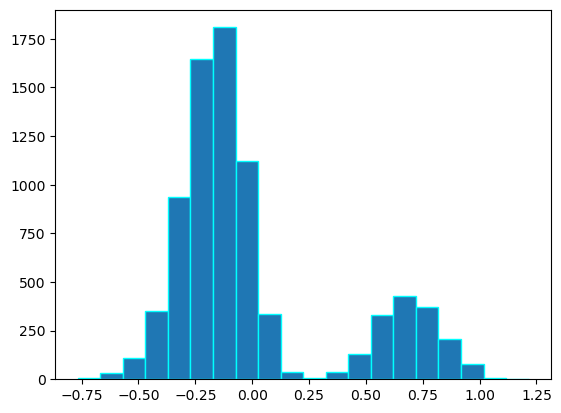

In [32]:
plt.hist(err_train,edgecolor='cyan',bins=20);

In [33]:
err_train.skew()

1.197231131136541

In [34]:
err_train.kurtosis() + 3

3.2215081682144873

### SCATTER PLOT

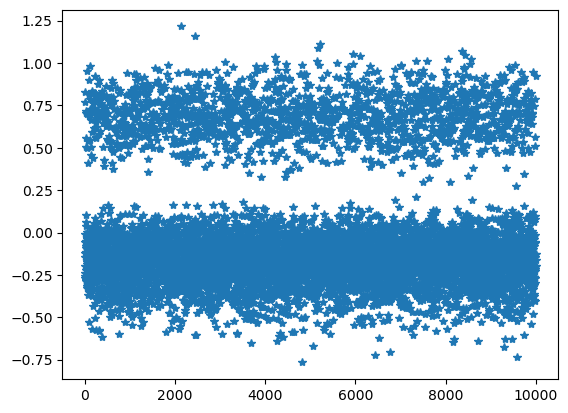

In [35]:
plt.plot(err_train,"*") # To see if erros are Random

In [36]:
pred_actual=pd.DataFrame()
pred_actual['Actual']=ch_train_y
pred_actual['Predicted']=pred_train_log

<Axes: xlabel='Actual', ylabel='Predicted'>

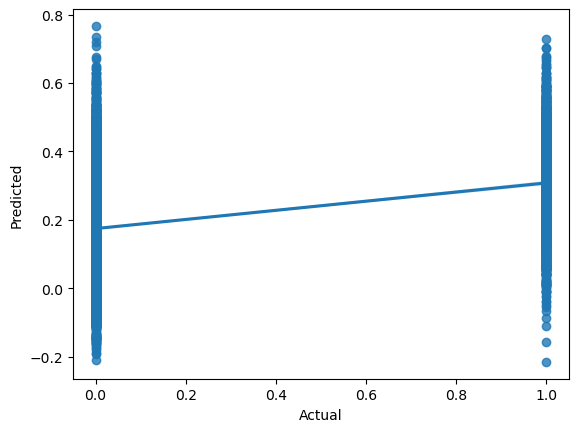

In [37]:
sns.regplot(x='Actual',y='Predicted',data=pred_actual)

# Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
logreg = LogisticRegression()
logreg.fit(ch_train_x,ch_train_y)

LogisticRegression()

In [40]:
pred_train =logreg.predict(ch_train_x)
pred_test = logreg.predict(ch_test_x)

### confusion_matrix

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
mat_test=confusion_matrix(ch_test_y,pred_test)
mat_test

array([[1530,   42],
       [ 401,   27]], dtype=int64)

In [43]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [44]:
accuracy_score(ch_test_y,pred_test)

0.7785

In [45]:
recall_score(ch_test_y,pred_test)

0.0630841121495327

In [46]:
precision_score(ch_test_y,pred_test)

0.391304347826087

In [47]:
f1_score(ch_test_y,pred_test)

0.10865191146881288

In [48]:
mat_test.diagonal().sum() / mat_test.sum()

0.7785

In [49]:
pred_prob_test=logreg.predict_proba(ch_test_x)
len(pred_prob_test)

2000

In [50]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

In [51]:


roc_auc_score(ch_test_y,pred_prob_test[:,1] )

0.6796598178402417

In [52]:
fpr, tpr,thre=roc_curve(ch_test_y,pred_prob_test[:,1] ) 

In [53]:
import matplotlib.pyplot as plt

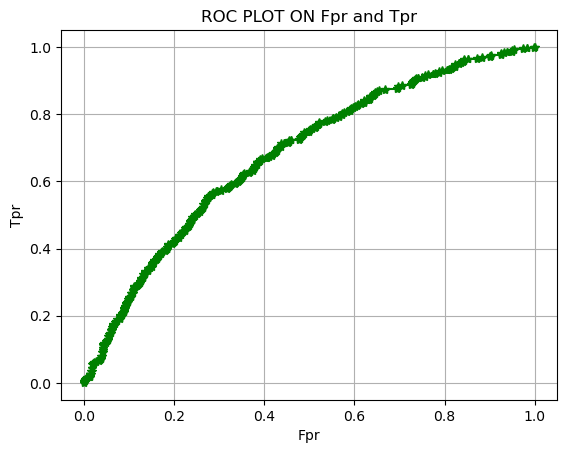

In [54]:
plt.plot(fpr,tpr, marker ='*', color='green')
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.title('ROC PLOT ON Fpr and Tpr')
plt.grid()

# Decision Tree(Gini)

In [55]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [56]:
dtc.fit(ch_train_x,ch_train_y)

DecisionTreeClassifier()

In [57]:
pred_train=dtc.predict(ch_train_x)
pred_test=dtc.predict(ch_test_x)

In [58]:
pred_train

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
mat_test=confusion_matrix(ch_test_y,pred_test)
mat_test

array([[1348,  224],
       [ 221,  207]], dtype=int64)

In [61]:
accuracy_score(ch_test_y,pred_test)

0.7775

In [62]:
recall_score(ch_test_y,pred_test)

0.48364485981308414

In [63]:
precision_score(ch_test_y,pred_test)

0.4802784222737819

In [64]:
f1_score(ch_test_y,pred_test)

0.4819557625145518

### Feature Importance

In [65]:
feat_imp=dtc.feature_importances_
feat_imp

array([0.09033104, 0.09809052, 0.09059204, 0.02666681, 0.01738727,
       0.20864663, 0.05970096, 0.11688679, 0.11189674, 0.01410503,
       0.0549071 , 0.11078906])

In [66]:
df_feat_imp=pd.DataFrame()
df_feat_imp['features']=ch_train_x.columns
df_feat_imp['IMP']=dtc.feature_importances_
df_feat_imp.sort_values(by='IMP', ascending=False)

,features,IMP
5,Age,0.208647
7,Balance,0.116887
8,NumOfProducts,0.111897
11,EstimatedSalary,0.110789
1,Surname,0.098091
2,CreditScore,0.090592
0,RowNumber,0.090331
6,Tenure,0.059701
10,IsActiveMember,0.054907
3,Geography,0.026667


In [67]:
a=list(feat_imp)
b=list(ch_train_x.columns)
c=list(zip(a,b))
c.sort(reverse=True)
#print(c)
df2=pd.DataFrame(c)
df2.columns=['values','imp']
df2

,values,imp
0,0.208647,Age
1,0.116887,Balance
2,0.111897,NumOfProducts
3,0.110789,EstimatedSalary
4,0.098091,Surname
5,0.090592,CreditScore
6,0.090331,RowNumber
7,0.059701,Tenure
8,0.054907,IsActiveMember
9,0.026667,Geography


# Decision_Tree_Entropy

In [68]:
dtc1=DecisionTreeClassifier(criterion='entropy')
dtc1.fit(ch_train_x,ch_train_y)

DecisionTreeClassifier(criterion='entropy')

In [69]:
pred_test2=dtc1.predict(ch_test_x)
pred_train2=dtc1.predict(ch_train_x)

In [70]:
confusion_matrix(ch_test_y,pred_test2)

array([[1345,  227],
       [ 215,  213]], dtype=int64)

In [71]:
accuracy_score(ch_test_y,pred_test2)

0.779

In [72]:
f1_score(ch_test_y,pred_test2)

0.49078341013824883

In [73]:
recall_score(ch_test_y,pred_test2)

0.4976635514018692

In [74]:
precision_score(ch_test_y,pred_test2)

0.48409090909090907

# Tree

In [75]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus 
import pydot
from six import StringIO

# GRID SEARCH

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
search_disct= {"criterion" : ["gini","entropy"],
                "max_depth" : range(4,9),
                "min_samples_split":[50,75,100]}

In [79]:
dt = DecisionTreeClassifier()
grid = GridSearchCV(dt,param_grid=search_disct)

In [80]:
grid.fit(ch_train_x,ch_train_y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(4, 9),
                         'min_samples_split': [50, 75, 100]})

#### Gives a best combination

In [81]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 100}

In [82]:
grid.predict(ch_test_x)

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

# Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=200,criterion='entropy')


In [84]:
rfc.fit(ch_train_x,ch_train_y)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [85]:
pred_rfc_ch =rfc.predict(ch_test_x)

In [86]:
tab_rfc_ch=confusion_matrix(ch_test_y,pred_rfc_ch)
tab_rfc_ch

array([[1523,   49],
       [ 234,  194]], dtype=int64)

In [87]:
tab_rfc_ch.diagonal().sum()/tab_rfc_ch.sum()*100

85.85000000000001

In [88]:


# from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
 
# fig, ax = plt.subplots(2, 2, figsize=(10,10))
# ax[0, 0].set_title("Test_Matrix_Logistic" ,  color ='red') 
# ax[0, 1].set_title("Train_Matrix_Logistic"  )
# ax[1,0].set_title("Test_Matrix-DT")
# ax[1,1].set_title("Train_Matrix-DT")

# ConfusionMatrixDisplay(
#     confusion_matrix=confusion_matrix(  ch_test_y , pred_test_log), display_labels=["Rej", 'App']).plot(ax=ax[0][0])

# ConfusionMatrixDisplay(
#     confusion_matrix=confusion_matrix(  ch_train_y, pred_train_log), display_labels=['Rej', 'App']).plot(ax=ax[0][1])

# ConfusionMatrixDisplay(
#     confusion_matrix=confusion_matrix(  ch_test_y, pred_test ), display_labels=['Rej', 'App']).plot(ax=ax[1][0])

# ConfusionMatrixDisplay(
#     confusion_matrix=confusion_matrix(  ch_train_y, pred_train), display_labels=['Rej', 'App']).plot(ax=ax[1][1])